In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = "https://github.com/raccamateo/NEC_BP_LR/raw/435db5cd2bcb17ad1909cb3927adb50c01326cec/winequality-red.csv"
wine_data = pd.read_csv(url)

In [19]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(wine_data.head())


First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

In [20]:
# Checking for Missing Values
missing_values = wine_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


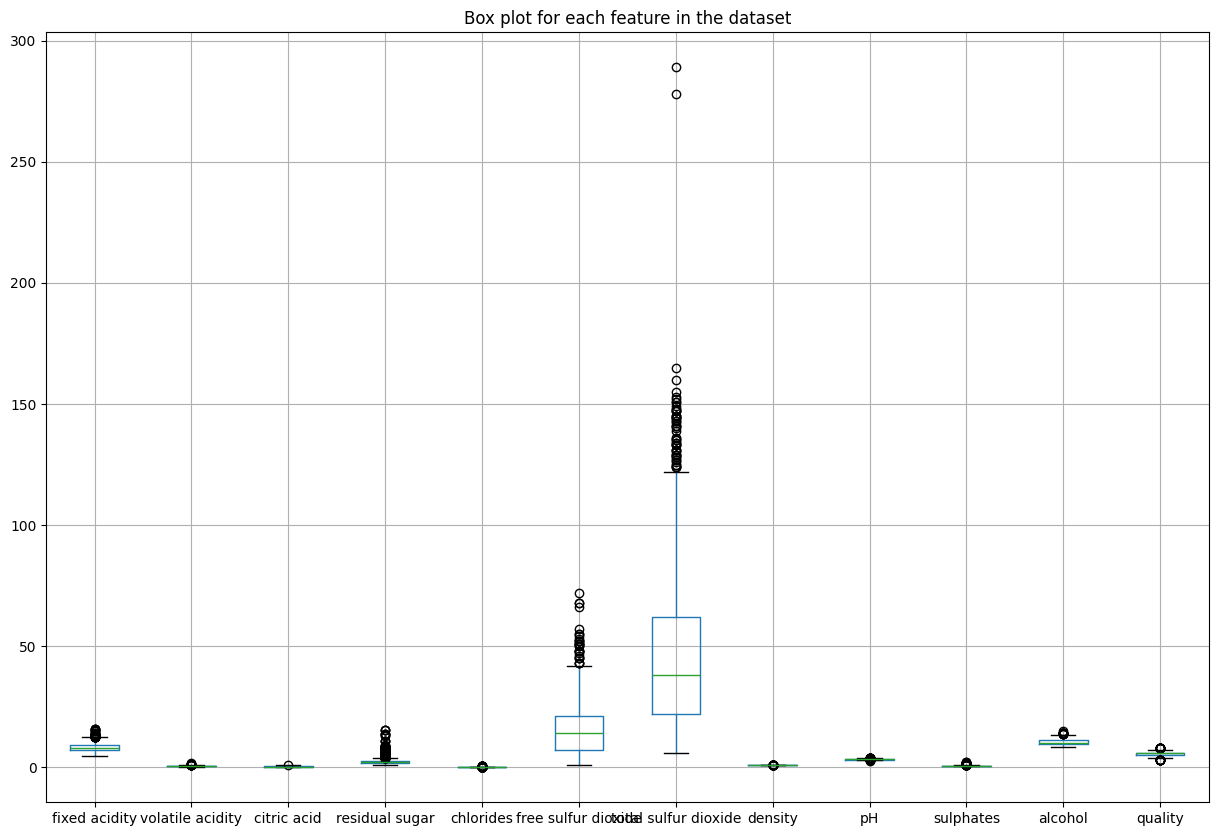

In [21]:
# Looking for Outliers using box plots
plt.figure(figsize=(15, 10))
wine_data.boxplot()
plt.title("Box plot for each feature in the dataset")
plt.show()

In [22]:
# Looking for duplicates
wine_data.duplicated().sum()

240

In [23]:
# Dropping duplicates
wine_data.drop_duplicates(inplace=True)
print(wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [24]:
# Outliers detection
def remove_outliers(df, threshold=1.5):
    # Calculate IQR for each feature
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    
    # Create a mask for each feature, where True indicates the value is not an outlier
    mask = ((df >= lower_bound) & (df <= upper_bound))
    
    # Apply the mask to the dataframe to keep only non-outliers
    # All rows must be True across all features to be kept
    return df[mask.all(axis=1)]

In [25]:
wine_data = remove_outliers(wine_data)
print(wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [26]:
def scale_features(df, target_column, feature_range=(0.1, 0.9)):
    df_scaled = df.copy()
    for column in df.columns:
        if column != target_column:  # Skip the target column
            col_min = df[column].min()
            col_max = df[column].max()
            df_scaled[column] = feature_range[0] + (feature_range[1] - feature_range[0]) * (df[column] - col_min) / (col_max - col_min)
    return df_scaled

In [27]:
normalized_wine_data = scale_features(wine_data, target_column='quality', feature_range=(0.1, 0.9))

In [28]:
# Shuffle the normalized dataset
wine_data_normalized_shuffled = normalized_wine_data.sample(frac=1, random_state=0).reset_index(drop=True)

In [30]:
wine_data_normalized_shuffled.to_csv('normalized_wine_data.csv', index=False)

In [ ]:
# Calculate the number of samples for training (80%) and testing (20%)
num_samples = len(wine_data_normalized_shuffled)
train_size = int(num_samples * 0.8)
test_size = num_samples - train_size

In [ ]:
# Split the dataset
train_data = wine_data_normalized_shuffled.iloc[:train_size]
test_data = wine_data_normalized_shuffled.iloc[train_size:]

In [ ]:
# Separate the features and the target variable for training data
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Separate the features and the target variable for test data
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
# Displaying the first few rows of the training and test sets
print("Training features:")
print(X_train.head())
print("\nTraining target:")
print(y_train.head())
print("\nTest features:")
print(X_test.head())
print("\nTest target:")
print(y_test.head())